In [ ]:
# impression: Number of ad views
# Click: Number of clicks on the displayed ad
# Purchase: Number of products purchased after ads clicked
# Earning: Earnings earned after purchasing products

1. Establish Hypotheses
2. Assumption Checking
- 1. Normality Assumption (shapiro)
- 2. Variance Homogeneity (levene)
3. Application of Hypothesis
- 1. If the assumptions are met, independent two sample t test
- 2. Mannwhitneyu test if assumptions are not met
4. Interpret the results according to the p-value
Note:
- If normality is not achieved, direct number 2. If variance homogeneity is not achieved, argument number 1 is entered.
- It may be useful to examine and correct outliers before normality examination.

In [ ]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.api as sms
from scipy.stats import ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu, pearsonr, spearmanr, kendalltau, f_oneway, kruskal
from statsmodels.stats.proportion import proportions_ztest

pd.set_option("display.max_columns", None)

# Task 1: Preparing and Analyzing Data

## Step 1: Read the data set consisting of control and test group data named ab_testing_data.xlsx. Assign control and test group data to separate variables.

In [ ]:
df_test = pd.read_excel("ab_testing.xlsx", sheet_name = "Test Group")
df_control = pd.read_excel("ab_testing.xlsx", sheet_name = "Control Group")

In [ ]:
df_test.head()

,Impression,Click,Purchase,Earning
0,120103.503796,3216.547958,702.160346,1939.611243
1,134775.943363,3635.082422,834.054286,2929.405820
2,107806.620788,3057.143560,422.934258,2526.244877
3,116445.275526,4650.473911,429.033535,2281.428574
4,145082.516838,5201.387724,749.860442,2781.697521


In [ ]:
df_control.head()

,Impression,Click,Purchase,Earning
0,82529.459271,6090.077317,665.211255,2311.277143
1,98050.451926,3382.861786,315.084895,1742.806855
2,82696.023549,4167.965750,458.083738,1797.827447
3,109914.400398,4910.882240,487.090773,1696.229178
4,108457.762630,5987.655811,441.034050,1543.720179


## Step 2: Analyze control and test group data.

###Control

In [ ]:
df_control.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Impression  40 non-null     float64
 1   Click       40 non-null     float64
 2   Purchase    40 non-null     float64
 3   Earning     40 non-null     float64
dtypes: float64(4)
memory usage: 1.4 KB


In [ ]:
df_control.describe().T

,count,mean,std,min,25%,50%,75%,max
Impression,40.0,101711.449068,20302.157862,45475.942965,85726.690349,99790.701078,115212.816543,147539.336329
Click,40.0,5100.657373,1329.985498,2189.753157,4124.304129,5001.220602,5923.803596,7959.125069
Purchase,40.0,550.894059,134.108201,267.028943,470.095533,531.206307,637.957088,801.795020
Earning,40.0,1908.568300,302.917783,1253.989525,1685.847205,1975.160522,2119.802784,2497.295218


In [ ]:
df_control.corr()

,Impression,Click,Purchase,Earning
Impression,1.000000,-0.311486,0.214575,0.107049
Click,-0.311486,1.000000,0.057397,-0.356690
Purchase,0.214575,0.057397,1.000000,0.061728
Earning,0.107049,-0.356690,0.061728,1.000000


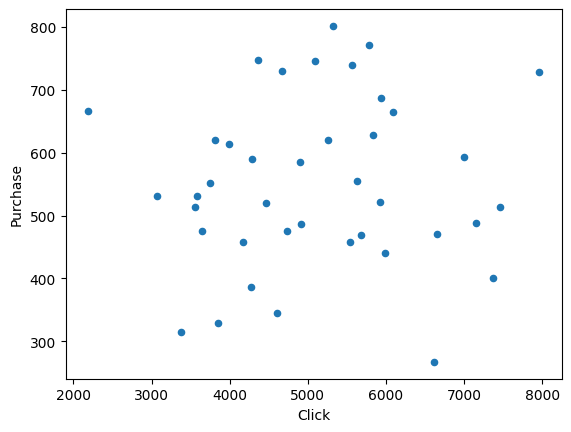

In [ ]:
df_control.plot.scatter("Click", "Purchase")
plt.show()

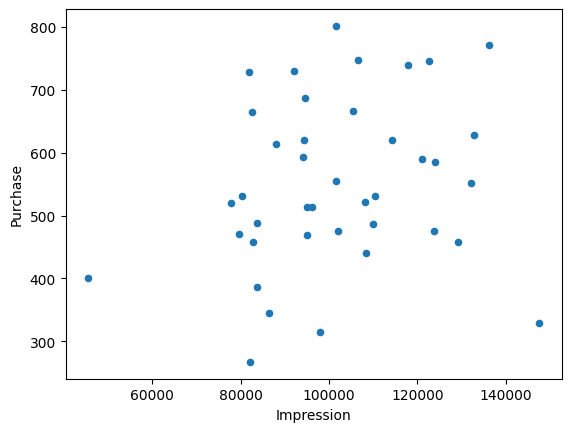

In [ ]:
df_control.plot.scatter("Impression", "Purchase")
plt.show()

###Test

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Impression  40 non-null     float64
 1   Click       40 non-null     float64
 2   Purchase    40 non-null     float64
 3   Earning     40 non-null     float64
dtypes: float64(4)
memory usage: 1.4 KB


In [ ]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Impression,40.0,120512.411758,18807.448712,79033.834921,112691.970770,119291.300775,132050.578933,158605.920483
Click,40.0,3967.549761,923.095073,1836.629861,3376.819024,3931.359804,4660.497911,6019.695079
Purchase,40.0,582.106097,161.152513,311.629515,444.626828,551.355732,699.862360,889.910460
Earning,40.0,2514.890733,282.730852,1939.611243,2280.537426,2544.666107,2761.545405,3171.489708


In [ ]:
df_test.corr()

,Impression,Click,Purchase,Earning
Impression,1.000000,-0.202751,0.137796,0.106646
Click,-0.202751,1.000000,-0.074414,0.197779
Purchase,0.137796,-0.074414,1.000000,0.102481
Earning,0.106646,0.197779,0.102481,1.000000


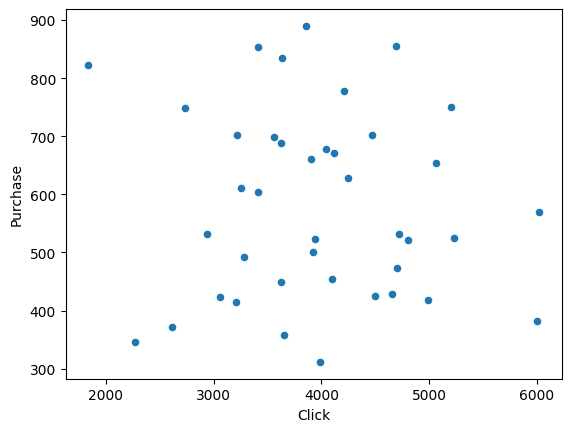

In [ ]:
df_test.plot.scatter("Click", "Purchase")
plt.show()

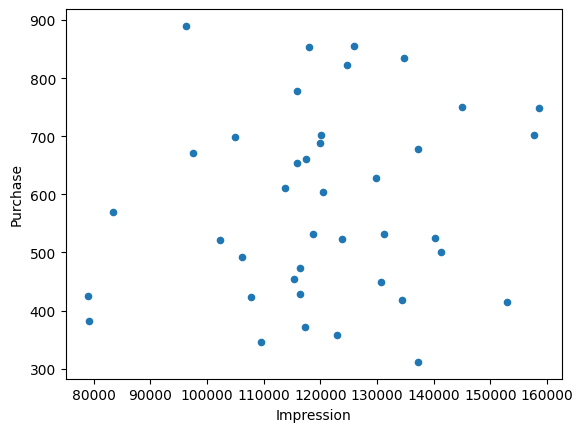

In [ ]:
df_test.plot.scatter("Impression", "Purchase")
plt.show()

## Step 3: After the analysis, combine the control and test group data using the concat method.

In [ ]:
df = pd.concat([df_control, df_test], axis = 1)

In [ ]:
df.head()

,Impression,Click,Purchase,Earning,Impression,Click,Purchase,Earning
0,82529.459271,6090.077317,665.211255,2311.277143,120103.503796,3216.547958,702.160346,1939.611243
1,98050.451926,3382.861786,315.084895,1742.806855,134775.943363,3635.082422,834.054286,2929.405820
2,82696.023549,4167.965750,458.083738,1797.827447,107806.620788,3057.143560,422.934258,2526.244877
3,109914.400398,4910.882240,487.090773,1696.229178,116445.275526,4650.473911,429.033535,2281.428574
4,108457.762630,5987.655811,441.034050,1543.720179,145082.516838,5201.387724,749.860442,2781.697521


In [ ]:
df.columns = ["impression_control", "click_control", "purchase_control", "earning_control", "impression_test", "click_test", "purchase_test", "earning_test"]

In [ ]:
df.head()

,impression_control,click_control,purchase_control,earning_control,impression_test,click_test,purchase_test,earning_test
0,82529.459271,6090.077317,665.211255,2311.277143,120103.503796,3216.547958,702.160346,1939.611243
1,98050.451926,3382.861786,315.084895,1742.806855,134775.943363,3635.082422,834.054286,2929.405820
2,82696.023549,4167.965750,458.083738,1797.827447,107806.620788,3057.143560,422.934258,2526.244877
3,109914.400398,4910.882240,487.090773,1696.229178,116445.275526,4650.473911,429.033535,2281.428574
4,108457.762630,5987.655811,441.034050,1543.720179,145082.516838,5201.387724,749.860442,2781.697521


# Task 2: Defining the Hypothesis of A/B Testing

##Step 1: Define the Hypothesis

In [ ]:
#H0: M1 = M2 (There is no statistically significant difference between the new and old model.)
#H1: M1 != M2 (There is)

## Step 2: Analyze purchase averages for the control and test groups

In [ ]:
df["purchase_control"].mean()

550.8940587702316

In [ ]:
df["purchase_test"].mean()# Baktığımızda biraz uzak gibi.

582.1060966484677

# TASK 3: Performing Hypothesis Testing

## Step 1: Before performing the hypothesis test, make assumption checks. These are Normality Assumption and Variance Homogeneity.

Test separately whether the control and test groups comply with the normality assumption using the Purchase variable.

In [ ]:
#Normality Assumption:
test_stat, pvalue = shapiro(df["purchase_control"])
print("test stat = %4f, p-value = %.4f" % (test_stat, pvalue))

test_stat, pvalue = shapiro(df["purchase_test"])
print("test stat = %4f, p-value = %.4f" % (test_stat, pvalue))
#H0 above 0.05 at two values Cannot be rejected.

test stat = 0.977269, p-value = 0.5891
test stat = 0.958945, p-value = 0.1541


In [ ]:
#Variance Homogeneity:
   #H0: Variances are Homogeneous
   #H1: Variances Are Not Homogeneous.

test_stat, pvalue = levene(df["purchase_control"],
                           df["purchase_test"])
print(pvalue)
#H0 Cannot be rejected. Variance homogeneity is ensured.

0.10828588271874791


## Step 2: Select the appropriate test according to the Normality Assumption and Variance Homogeneity results

In [ ]:
#Assumptions provided. We choose the parametric Ttest.
test_stat, pvalue = ttest_ind(df["purchase_control"],
                              df["purchase_test"], equal_var = True)
print("test stat = %4f, p-value = %.4f" % (test_stat, pvalue))
#H0 Cannot be rejected. H0 => (There is no statistically significant difference between the new and old model.)

test stat = -0.941558, p-value = 0.3493


## Step 3: Considering the p_value value obtained as a result of the test, comment on whether there is a statistically significant difference between the purchasing averages of the control and test groups.

In [ ]:
#When we look at our result, it is well above our threshold value of 0.05, therefore H0 cannot be rejected. Our H0 meant there is no difference.
#In this case, there is no statistically significant difference between these 2 features.

# TASK 4 : Analysis of Results

## Step 1: State which test you used and the reasons.

In [ ]:
#Since the assumptions were met, we performed the parametric test.

## Step 2: Give advice to the customer based on the test results you obtain.

In [ ]:
#There is no difference between the new feature and the old feature. You can use whichever is more affordable in terms of cost.